# DATA ANALYSIS

## 1. Ý nghĩa của thuộc tính:
- **Country**: Tên quốc gia
- Total Cases: Tổng số ca nhiễm
- New Cases: Số ca nhiễm mới
- Total Deaths: Tổng số ca tử vong
- New Deaths: Số ca tử vong mới
- Total Recovered: Tổng số ca hồi phục
- New Recovered: Số ca hồi phục mới
- Active Cases: Tổng số ca đang điều trị
- Serious, Critical: Số ca nghiêm trọng, nguy kịch
- Tot Cases/1M pop: Số ca nhiễm trên 1 triệu dân
- Deaths/1M pop: Số ca tử vong trên 1 triệu dân
- Total tests: Tổng số lần test
- Tests/1M pop: Số lần test trên 1 triệu dân
- Population: Dân số
- Continent: Châu lục
- 1 Case every X ppl: 1 ca nhiễm trên X dân
- 1 Death every X ppl: 1 ca tử vong trên X dân
- 1 Test every X ppl: 1 lần test trên X dân
- New Cases/1M pop: Số ca nhiễm mới trên 1 triệu dân
- New Deaths/1M pop: Số ca tử vong mới trên 1 triệu dân
- Active Cases/1M pop: Số ca đang điều trị trên 1 triệu dân

## 2. Phân tích các mối quan hệ nhờ trực quan

In [69]:
# Import thư viện: 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import geopandas
import numpy as np
import matplotlib.ticker as ticker

In [70]:
# Đọc dữ liệu:
covid_df = pd.read_csv('../data/modified/Modified_March_06_2023_corona_data.csv')
covid_df.head(5)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,...,Total tests,Tests/1M pop,Population,Continent,1 Case every X ppl,1 Death every X ppl,1 Test every X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,USA,105396817.0,0.0,1146740.0,0.0,102864696.0,0.0,1385381.0,2726.0,314800.0,...,1.167686e+09,3487657.0,3.348053e+08,North America,3.0,292.0,0.0,0.0,0.0,4138.0
1,India,44688101.0,0.0,530775.0,0.0,44154425.0,0.0,2901.0,0.0,31770.0,...,9.191891e+08,653468.0,1.406632e+09,Asia,31.0,2650.0,2.0,0.0,0.0,2.0
2,France,39638159.0,0.0,165030.0,0.0,39400459.0,706.0,72670.0,869.0,604383.0,...,2.714902e+08,4139547.0,6.558452e+07,Europe,2.0,397.0,0.0,0.0,0.0,1108.0
3,Germany,38210850.0,0.0,168397.0,0.0,37767300.0,17500.0,275153.0,0.0,455522.0,...,1.223324e+08,1458359.0,8.388360e+07,Europe,2.0,498.0,1.0,0.0,0.0,3280.0
4,Brazil,37076053.0,0.0,699276.0,0.0,36249161.0,0.0,127616.0,0.0,172164.0,...,6.377617e+07,296146.0,2.153536e+08,South America,6.0,308.0,3.0,0.0,0.0,593.0


### 2.1 Biểu đồ: 

#### 1. Mối quan hệ xoay quanh trường dữ liệu `New Cases` (số ca nhiễm mới): 

#### 1.1 Các quốc gia có số ca mắc covid cao nhất:
- **Trường dữ liệu được trực quan**:  `New Cases`
- **Biểu đồ sử dụng**: Bar chart.
- **Tính phù hợp của biểu đồ**: Để dễ dàng so sánh top 10 quốc gia có ca mắc covid mới, bar chart là một biểu đồ phù hợp vì việc so sánh được thể hiện rõ ở chiều cao các cột tương ứng với các quốc gia (các giá trị rời rạc). 
- **Mục đích của câu hỏi:** Để kiểm tra tình trạng kiểm soát dịch của các quốc gia trên thế giới, nhóm lọc ra 10 quốc gia có số ca nhiễm covid mới ở thời điểm hiện tại rồi từ đó xem xét các mối quan hệ xung quanh nó.

In [71]:
df_top = covid_df[['Country', 'New Cases']]
df_top = df_top.sort_values(by='New Cases', ascending=False).head(10)

fig = go.Figure()
fig.add_trace(go.Bar(x=df_top['Country'], y=df_top['New Cases']))
fig.update_layout(title='Top 10 quốc gia có ca mắc covid mới cao nhất', 
                xaxis_title='Quốc gia', yaxis_title='Số lượng')

fig.show()

- **Nhận xét biểu đồ**: 
  - Nga là quốc gia có số lượng ca mắc covid mới nhiều nhất trong ngày 06/03/2023. Điều này có thể được giải thích là do tỷ lệ tiêm phòng vắc xin của công chúng Nga đang giảm dần và việc đó đã trở nên không còn bắt buộc, quảng bá với các chủng virus mới, các lệnh bắt buộc mang khẩu trang tại nơi đông người bị gỡ bỏ. Hậu quả là số ca mắc tăng do miễn dịch cộng đồng không hiệu quả.
  - Hầu hết các quốc gia có số ca nhiễm mới thuộc top đầu đều là các nước thuộc châu Á và châu Âu.
  
- **Quan hệ với các trường dữ liệu khác**: Nhìn tổng quan biểu đồ, số ca nhiễm của các quốc gia khác không cao như Nga, phải chăng điều này có lẽ là do Nga có dân số đông hơn các quốc gia còn lại nên số ca nhiễm cũng từ đó mà cao vượt trội hơn hẳn? Từ đó, nhóm có một câu hỏi đặt ra là:

#### 1.2 Liệu dân số có ảnh hưởng đến việc tăng các ca nhiễm mới?
- **Trường dữ liệu được trực quan**: `New Cases`, `Population`.
- **Biểu đồ sử dụng**: Scatter.
- **Tính phù hợp của biểu đồ**: Scatter là biểu đồ thông dụng nhất khi quan sát mối quan hệ của hai biến, đặc biệt là xem xét sự tương quan giữa hai biến đó. Với lý do như vậy nên sử dụng scatter plot cho câu hỏi xem xét liệu 2 biến `New Cases` và `Population` có sự tương quan với nhau hay không là phù hợp.
- **Mục đích của câu hỏi:** Nhằm xem xét sự tương quan giữa số dân với mức nhiễm hiện tại của một quốc gia. Nếu một quốc gia đông dân thì số ca nhiễm cũng tăng lên nhiều theo dân số, ngược lại nếu một quốc gia ít dân thì số ca nhiễm cũng thấp theo.

In [72]:
epsilon = 1e-9
covid_df['Population'] = covid_df['Population']
covid_df['New Cases'] = covid_df['New Cases'] + epsilon

fig = px.scatter(data_frame=covid_df, x='Population', y='New Cases', 
                 log_x=True, log_y=True, trendline='ols',
                 labels={'Population': 'Dân số (log scale)', 
                         'New Cases': 'Số ca nhiễm mới (log scale)'},
                 title='Mối quan hệ giữa dân số và số ca nhiễm mới' )

fig.show()

- **Nhận xét biểu đồ**: 
  - Dựa vào biểu đồ với trendline (đường xu hướng), ta có một phương trình hồi quy là: $$New \ Cases = 3.66312*10^{-7} * Population + 148.228$$ và hệ số xác định của nó là: $$R^2 = 0.002435$$. Điều này cho ta biết thì với mỗi đơn vị tăng dân số, số ca mắc mới tăng khoảng $3.66312*10^{-7}$ đơn vị và giá trị cố định ban đầu của ca mắc mới là 148228. Với $R^2 = 0.002435$ cho ta biết chỉ khoảng 0.24% là sự biến thiên của số ca mắc mới có thể được giải thích bởi sự biến đổi của dân số. Như vậy, ta có thể khẳng định được rằng dân số không phải là một yếu tố quyết định trong việc giải thích sự biến động của ca mắc mới. 
  - Có lẽ vì một số nước đông dân đã áp dụng tốt các quy định về phòng chống dịch covid hoặc miễn dịch cộng đồng cao làm cho số ca mắc mới giảm. 

#### 1.3 Tình hình hồi phục của các quốc gia với dịch bệnh qua mối quan hệ của 3 biến `Active Cases, New Cases, New Recovered`:
- **Trường dữ liệu được trực quan**: `Active Cases, New Cases, New Recovered`.
- **Biểu đồ sử dụng**: Bubble scatter chart.
- **Tính phù hợp của biểu đồ**: Bubble scatter chart cho phép vừa biểu thị mối quan hệ giữa hai biến `New Cases`, `New Recoverd` cũng vừa có thể cho phép biến thứ ba là `Active Cases` tham gia vào quá trình trực quan (thể hiện dưới dạng kích thước điểm dữ liệu) mà không cần sử dụng một biểu đồ 3D để làm việc đó.
- **Mục đích của câu hỏi:** Nhằm thể hiện tình hình hồi phục của các quốc gia có nhanh chóng hay không để cung cấp tốt các hoạt động chữa trị bệnh Covid-19, tránh sự quá tải về cơ sở y tế. Ví dụ nếu như số ca đang điều trị lớn, tình hình hồi phục nhỏ mà số ca mắc mới lại tăng lên sẽ làm cho tình trạng các cơ sở y tế bị quá tải, phải lập thêm nhiều trạm xá/bệnh viện hơn nữa để đáp ứng việc chữa trị.

In [73]:
fig = px.scatter(covid_df, x='New Cases', y='New Recovered', size='Active Cases', 
                 color='Active Cases', hover_name='Country',
                 labels={'New Recovered': 'Số ca hồi phục mới', 
                         'Active Cases': 'Số ca đang chữa trị',
                         'New Cases': 'Số ca nhiễm mới'},
                 title='Tình hình chịu tải/hồi phục của các quốc gia',
                 size_max=60)
    
fig.show()

- **Nhận xét biểu đồ:**
	- Tình hình y tế của đa số các nước không gặp vấn đề gì vì số ca nhiễm mới bị ít đi, số ca hồi phục cũng nhiều hơn đáng kể so với số ca đang điều trị hiện tại. Điều này cho thấy sự tích cực trong việc phòng và chữa bệnh của các quốc gia cũng như cơ sở y tế của họ không bị quá tải.
	- Nhật Bản là nơi có số ca nhiễm mới không quá cao, số ca hồi phục cũng ít nhưng lại có số ca đang chữa trị lớn nhất trên thế giới. Điều này chứng tỏ việc khả năng chữa bệnh của quốc gia này đang hạn chế so với phần còn lại nhưng có lẽ cũng sẽ không bị quá tải y tế.
	- Nga là nước có số ca đang chữa trị thấp nhưng số ca nhiễm mới lại cao, tình hình hồi phục cũng thấp. Những thông số này cho thấy tình hình của Nga thật báo động vì nếu cứ tiếp tục theo xu hướng này, Nga sẽ bị quá tải về các cơ sở y tế.
	- Ta có thể rút ra một điều: Nếu số ca nhiễm mới mà thấp, số ca đang chữa trị cao, số ca hồi phục cao thì quốc gia đó đang có tình hình y tế ổn định, kiểm soát được tình trạng lây lan dịch bệnh tốt và dấu hiệu chữa trị tích cực.

#### 1.4 Ca nhiễm mới tăng lên theo thời gian thì số ca tử vong mới, ca nguy kịch mới liệu có cùng tăng lên hay không?
- **Trường dữ liệu được trực quan**: `'New Cases', 'New Deaths', 'Serious, Critical' và trường phụ `Date`
- **Biểu đồ sử dụng**: Line chart.
- **Tính phù hợp của biểu đồ**: Line chart thể hiện xu hướng giữa các biến theo trình tự thời gian. Việc sử dụng line chart ở quan hệ này cho nhóm thấy được xu hướng thay đổi theo thời gian (1 tuần) giữa ba biến `New Cases`, `New Deaths` và `Serious, Critical`, từ đó đưa ra kết luận liệu 3 biến này có mối quan hệ với nhau (cụ thể là đồng biến, nghịch biến) hay không.
- **Mục đích của câu hỏi:** Nhằm thể hiện tình hình dịch bệnh Covid-19 qua thời gian, đặc biệt là tình hình tăng cao của các ca nhiễm mới, ca tử vong mới, ca nguy kịch mới. Ví dụ nếu như số ca nhiễm mới tăng lên theo thời gian thì số ca tử vong mới, nguy kịch mới tăng cùng thì đây là dấu hiệu báo động về tình hình dịch bệnh, chính phủ cần đưa ra các biện pháp quyết liệt hơn để kiểm soát dịch bệnh.

In [74]:
# Tiền xử lý dữ liệu cho mối liên hệ giữa các trường này:

def genDateDataframe(path, date):
    df = pd.read_csv(path)
    df = df[['Country', 'New Cases', 'New Deaths', 'Serious, Critical']]
    df['Date'] = date
    df['Date'] = pd.to_datetime(df['Date'])

    return df

dfCovid_0603 = genDateDataframe('../data/modified/Modified_March_06_2023_corona_data.csv', '2023-03-06')
dfCovid_0703 = genDateDataframe('../data/modified/Modified_March_07_2023_corona_data.csv', '2023-03-07')
dfCovid_0803 = genDateDataframe('../data/modified/Modified_March_08_2023_corona_data.csv', '2023-03-08')
dfCovid_0903 = genDateDataframe('../data/modified/Modified_March_09_2023_corona_data.csv', '2023-03-09')
dfCovid_1103 = genDateDataframe('../data/modified/Modified_March_11_2023_corona_data.csv', '2023-03-11')
dfCovid_1303 = genDateDataframe('../data/modified/Modified_March_13_2023_corona_data.csv', '2023-03-13')

dfCovid = pd.concat([dfCovid_0603, dfCovid_0703, dfCovid_0803, 
                     dfCovid_0903, dfCovid_1103, dfCovid_1303])

In [75]:
dfCovid_top = covid_df[['Country', 'New Cases']]
dfCovid_top = dfCovid_top.sort_values(by='New Cases', ascending=False).head(5)

fig = make_subplots(rows=5, cols=1, shared_xaxes=True,
                    subplot_titles=(dfCovid_top['Country'].values))

for i in range(5):
    country = dfCovid_top['Country'].values[i]
    dfCovid_country = dfCovid[dfCovid['Country'] == country]
    
    fig.add_trace(go.Line(x=dfCovid_country['Date'], y=dfCovid_country['New Cases'], 
                          name='New Cases', line_color='blue', showlegend=i==0), row=i+1, col=1)
    fig.add_trace(go.Line(x=dfCovid_country['Date'], y=dfCovid_country['New Deaths'], 
                          name='New Deaths', line_color='red', showlegend=i==0), row=i+1, col=1)
    fig.add_trace(go.Line(x=dfCovid_country['Date'], y=dfCovid_country['Serious, Critical'], 
                          name='Serious, Critical', line_color='green', showlegend=i==0), row=i+1, col=1)
    

fig.update_layout(height=1000, width=800, title_text="Tình hình dịch bệnh tại 5 quốc gia có số ca mắc covid mới nhiều nhất");
fig.show();

/home/alex/.local/lib/python3.10/site-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




- **Nhận xét biểu đồ:**
  - Với 5 quốc gia được cho là có số ca nhiễm mới nhiều nhất tại thời điểm 06-03-2023 thì sau 1 tuần, số ca tử vong mới và số ca nguy kịch không có dấu hiệu tăng theo số ca nhiễm mới. Điều này làm rõ mối quan hệ của hai biến `New Deaths` và `Serious, Critical` với biến `New Cases` dường như không đồng biến với nhau, tức là "số ca nhiễm mới tăng lên thì sau một thời gian, số ca nguy kịch, tử vong mới không tăng lên theo số ca nhiễm mới".
  - Để giải thích cho điều trên thì có lẽ vì các quốc gia đã tiêm chủng vắc-xin đầy đủ, hệ miễn dịch cộng đồng mạnh mẽ nên không bị nguy kịch như lúc dịch mới bùng phát, chứng tỏ rằng covid-19 không phải là dịch bệnh nguy hiểm nữa ở thời điểm hiện tại.

#### 2. Mối quan hệ giữa 2 trường dữ liệu `1 Test every X ppl` và `1 Case every X ppl`:
#### 2.1 Tỉ lệ người mắc Covid và tỉ lệ người được xét nghiệm Covid có sự phân bố theo vị trí địa lý của quốc gia trên thế giới không?

- **Trường dữ liệu được trực quan:** `1 Test every X ppl` , `1 Case every X ppl`
- **Biểu đồ sử dụng:** Choropleth Map.
- **Tính phù hợp của biểu đồ:** Biểu đồ Choropleth Map cho phép chúng ta có thể nhìn thấy được thực tế tình trạng trên hình ảnh của toàn bộ thế giới, tuy rằng dữ liệu được trực quan lên sẽ không được hoàn toàn đầy đủ và chính xác như các biểu đồ số liệu khác, nhưng nó sẽ cho chúng ta một cái nhìn dễ dàng hơn trong việc so sánh sự ảnh hưởng của vị trí địa lý, điều này thì rất là khó để thể hiện trên các biểu đồ thông thường, và do thế chúng ra có thể nhận xét rõ hơn trên từng khu vực ta muốn, thay vì chỉ là từng quốc gia hay lục địa cụ thể.
- **Mục đích câu hỏi:** Kiểm tra xem sự lây lan của dịch Covid có khác nhau khi nhận xét tổng quan trên toàn bộ thế giới hay không, cũng như là tình trạng kiểm tra sức khỏe y tế của các khu vực.

In [76]:
# Lấy dữ liệu về các đồ thị quốc gia
df = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))


In [77]:
#đổi tên cột cũng như đổi đổi tên các quốc qua cho đúng với data từ Geopandas
df = df.rename(columns={"name":"Country"})
covid_df =  covid_df.replace(['USA','UK','Bosnia and Herzegovina',
                              'S. Korea','Western Sahara','South Sudan',
                              'Dominican Republic','Solomon Islands',
                              'Equatorial Guinea','Falkland Islands',
                              'Eswatini','DPRK','DRC',
                              'UAE','CAR','Ivory Coast'],
                              
                ['United States of America','United Kingdom','Bosnia and Herz.',
                   'South Korea','W. Sahara', 'S. Sudan',
                   'Dominican Rep.', 'Solomon Is.',
                   'Eq. Guinea','Falkland Is.', 
                   'eSwatini', 'North Korea','Dem. Rep. Congo',
                   'United Arab Emirates','Central African Rep.', "Côte d'Ivoire"])

In [78]:
#Gộp dữ liệu 2 bảng
data = geopandas.GeoDataFrame(
    covid_df.set_index('Country').join(
        df[['Country','geometry']].set_index('Country'),
        lsuffix='_caller', 
        rsuffix='_other',)
    )

In [79]:
def MapPlot(Col, Norm = None,figsize =(30,18),fig = None, 
            ax = None,data=data,cmap ='cool',vcenter = None,
            fontdict={'fontsize': '25', 'fontweight': '3'} 
            ):
    col_plot = Col
    if fig == None and ax == None:
        fig, ax = plt.subplots(1, figsize=figsize)
    ax.axis('off')
    if type(Col) == type(""):
        col_plot = data[Col]
        ax.set_title(Col, fontdict=fontdict)

    if vcenter != None:
        colorNorm = colors.CenteredNorm(vcenter=vcenter)
    else:
        if Norm == None:
            vmin =  col_plot.min()
            vmax =  col_plot.max()
        else:
            vmin =  Norm(col_plot.min())
            vmax =  Norm(col_plot.max())
        colorNorm = plt.Normalize(vmin=vmin, vmax=vmax)

    if Norm == None:
        data.plot(col_plot,ax = ax,linewidth = 1, cmap = cmap , norm = colorNorm,edgecolor='black')
    else:
        data.plot(Norm(col_plot),ax = ax,linewidth = 1, cmap = cmap,edgecolor='black')
    ax.annotate('', xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', 
                verticalalignment='bottom', fontsize=10)
    
    sm = plt.cm.ScalarMappable(norm=colorNorm, cmap=cmap)
    sm._A = []
    # Add the colorbar to the figure
    cbaxes = ax.inset_axes([0.01, 0.02, 0.01, 1])
    cbar = fig.colorbar(sm, cax=cbaxes)

/tmp/ipykernel_17068/862076305.py:35: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

/home/alex/.local/lib/python3.10/site-packages/geopandas/plotting.py:955: UserWarning:

Glyph 739 (\N{MODIFIER LETTER SMALL X}) missing from current font.



Text(0.5, 1.0, '1 lần test với mỗi 10ˣ dân số')

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 739 (\N{MODIFIER LETTER SMALL X}) missing from current font.



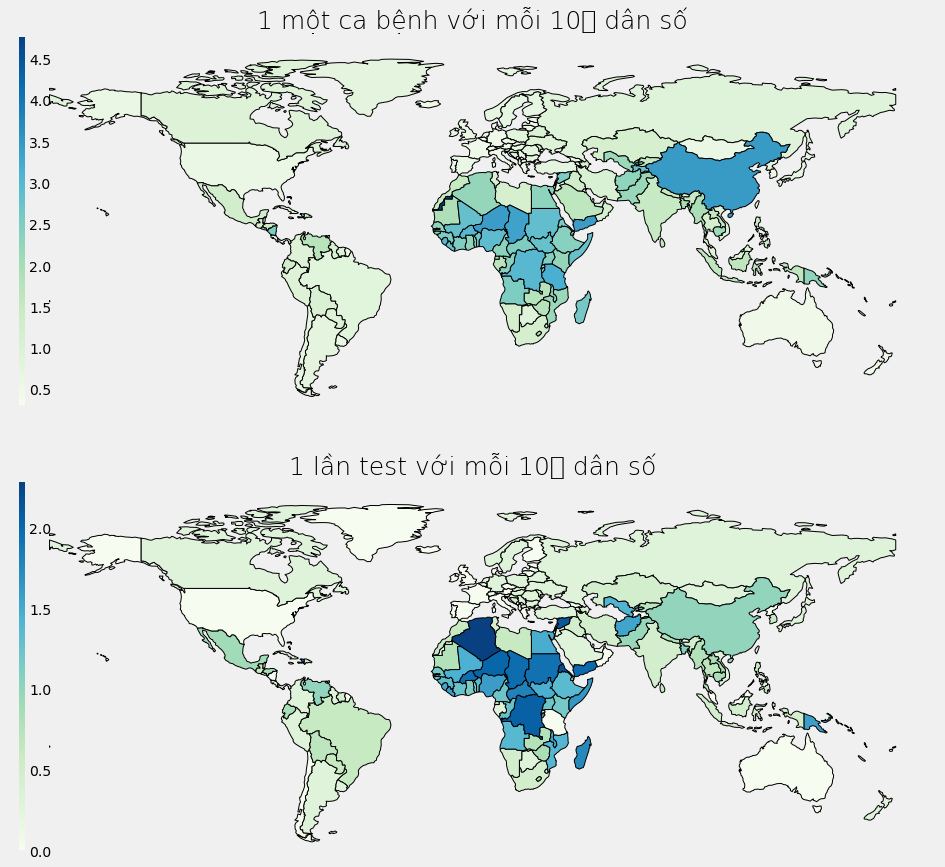

In [80]:
fig, (ax1,ax2) = plt.subplots(2, figsize=(30, 14))

MapPlot('CasePerPPL', 
        data = data.assign(CasePerPPL = lambda x: x['1 Case every X ppl']+1),
        cmap = 'GnBu',
        ax=ax1,
        fig=fig, 
        Norm = np.log10)
ax1.set_title('1 một ca bệnh với mỗi 10ˣ dân số', fontdict={'fontsize': '25', 'fontweight': '3'})

MapPlot('CasePerPPL', 
        data = data.assign(CasePerPPL = lambda x: x['1 Test every X ppl']+1), 
        cmap = 'GnBu',
        ax=ax2,
        fig=fig, 
        Norm = np.log10)
ax2.set_title('1 lần test với mỗi 10ˣ dân số', fontdict={'fontsize': '25', 'fontweight': '3'})

- **Nhận xét biểu đồ:**
    - Ta có thể thấy được có thể thấy được tỉ lệ mắc bệnh có vẻ được phân bố theo cách các nước có tỉ lệ nhiễm thấp lại ở gần nhau (Lục địa châu Phi) và phần nhỏ Châu Á. Để giải thích cho điều này thì đa phần các khu vực này có nhiệt độ và độ ẩm không thích hợp với Covid nên tỉ lệ bị nhiễm sẽ thấp hơn với phần còn lại của thế giới.
    - Nếu xem xét thêm về điều kiện kiểm tra bệnh, tại các khu vực này cũng có điều kiện kiểm tra thấp nhất trên toàn thế giới, vậy liệu điều này có phải là lí do giải thích cho việc khu vực này ghi nhận ít ca bệnh hơn khu vực khác hay còn nguyên nhân nào đó?

#### 2.2 Việc tỉ lệ kiểm tra y tế có ảnh hưởng đến số ca bệnh được ghi nhận trên hệ thống hay không?
- **Trường dữ liệu được trực quan**: `1 Test every X ppl` , `1 Case every X ppl`
- **Biểu đồ sử dụng:** Scatter chart.
- **Tính phù hợp của biểu đồ:** Việc xem xét mối tương quan giữa 2 trường dữ liệu thì biểu đồ scatter vẫn cho ta một cái nhìn dễ nhất, khi mà tất cả điểm dữ liệu được trực quan trên một biểu đồ 1 cách rõ ràng, từ đó ta cũng có thể xem được phân bố của các dữ liệu này như thế nào.

In [81]:
px.scatter(
            x=covid_df['1 Test every X ppl'],
            y = covid_df['1 Case every X ppl'],
            log_y= True,log_x=True,
            trendline="lowess"
        )

In [82]:
np.log(covid_df[['1 Test every X ppl','1 Case every X ppl']]+1).corr()

,1 Test every X ppl,1 Case every X ppl
1 Test every X ppl,1.000000,0.780879
1 Case every X ppl,0.780879,1.000000


- **Nhận xét biểu đồ:**
  - Tại mỗi mức chỉ số `1 Test every X ppl` thì ra thấy chỉ số `1 Case every X ppl` được phân bố hầu như trong một khoản xác định và có xu hướng hơi tăng dần.
  - Từ biểu đồ này ta cũng thấy được rằng việc kiểm tra cũng phần nào phản ánh việc ghi nhận ca nhiễm bệnh trên thế giới, nên đây cũng là điều đáng phải quan tâm để có thể ghi nhận ca bệnh tốt nhất, giúp ích cho công cuộc theo dõi tình hình Covid trên toàn thế giới nói chung.

#### 3 Mối quan hệ xoay quanh trường dữ liệu `Total Cases` (Tổng số ca nhiễm):

#### 3.1 Tỉ lệ số ca nhiễm và tỉ lệ số ca hồi phục của các Châu lục như thế nào?

- **Trường dữ liệu được trực quan:**`Total Cases, Total Recovered, Continent`.
- **Biểu đồ sử dụng:** Nested Pie chart (Nested Donut chart).
- **Tính phù hợp của biểu đồ:** Nested Pie chart thường được sử dụng để hiển thị các tỷ lệ phần trăm của các phân loại dữ liệu con bên trong một phân loại dữ liệu lớn hơn. Trong trường hợp này, nhóm em sử dụng cho mục đích so sánh tỉ lệ số ca hồi phục so với số ca nhiễm khi cái trước là 1 phần nhỏ của cái sau.
- **Mục đích của câu hỏi:**  Để xem tình hình và kết quả khám chữa bệnh các bệnh nhân nhiễm Covid-19 ở các châu lục đã và đang diễn ra như thế nào, và phần nào chứng tỏ mức độ hiện đại và hiệu quả của nền y học của các châu lục.

In [83]:
# Define the custom formatting function
def format_y_axis(value, pos=0):
    if value >= 1_000_000_000:
        return f"{value/1_000_000_000:.2f}B"
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return f"{value:.0f}"

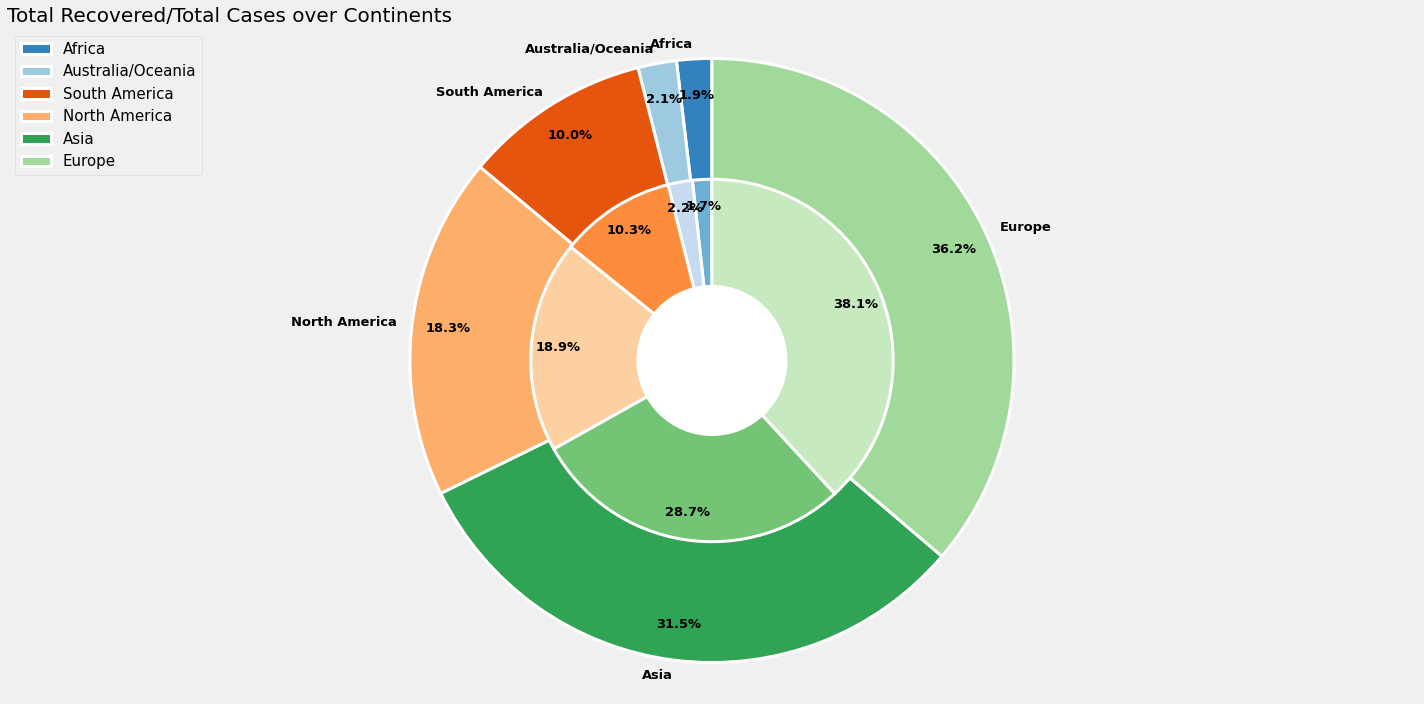

In [84]:
continent_total_cases = pd.pivot_table(data=covid_df,
                                        values=['Total Cases', 'Total Recovered'],
                                        index='Continent',
                                        aggfunc='sum',
                                      ).sort_values(by='Total Cases')

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(6)*2)
inner_colors = cmap([1, 3, 5, 7, 9, 11])

plt.figure(figsize=(20,10))

plt.pie (
  continent_total_cases['Total Cases'],
  labels=continent_total_cases.index,
  startangle=90, pctdistance =0.88,
  colors=outer_colors,
  autopct = '%1.1f%%', radius= 1.0, labeldistance=1.05,
  textprops ={ 'fontweight': 'bold','fontsize':13},
  wedgeprops = {'linewidth' : 3, 'edgecolor' : "w"}
)

plt.pie (
  continent_total_cases['Total Recovered'],
  startangle=90, pctdistance =0.85,
  colors=inner_colors,
  autopct = '%1.1f%%', radius= 0.6, labeldistance=1.05,
  textprops ={ 'fontweight': 'bold','fontsize':13},
  wedgeprops = {'linewidth' : 3, 'edgecolor' : "w"}
)

centre_circle = plt.Circle((0,0), 0.25, fc='white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Total Recovered/Total Cases over Continents', fontsize=20, loc='left')
plt.axis('equal')
plt.legend(loc=2, fontsize=15)
plt.tight_layout()
plt.show()

**Nhận xét biểu đồ**:
- Châu Âu, Châu Á là hai châu lục có số ca nhiễm nhiều nhất thế giới, theo sau đó là Châu Mỹ (gồm Bắc Mỹ và Nam Mỹ)
- Các Châu lục kể trên với Châu Đại dương và Châu Phi, ngoại trừ Châu Á và Châu Phi, có tỉ lệ số ca hồi phục cao hơn tỉ lệ số ca nhiễm (so với toàn thế giới), phần nào chứng tỏ hiệu quả của công tác khám chữa bệnh ở các châu lục này.

#### 3.2 Tổng số ca hồi phục trên toàn thế giới có phụ thuộc vào tổng số ca nhiễm hay không?

- ***Trường dữ liệu được trực quan:*** `Total Cases`, `Total Recovered`
- ***Biểu đồ sử dụng:*** Scatter chart.
- ***Tính phù hợp của biểu đồ:*** Để thấy được mối tương quan giữa 2 trường dữ liệu để xem rằng 2 trường dữ liệu này có mối quan hệ tác động, phụ thuộc hoặc độc lập với nhau không.
- ***Mục đích của câu hỏi:*** Để nắm rõ được tình hình rằng các ca nhiễm covid có ảnh hưởng như thế nào đến số ca hồi phục trên toàn thế giới để phần nào hiểu rõ được tình hình phòng chống dịch.

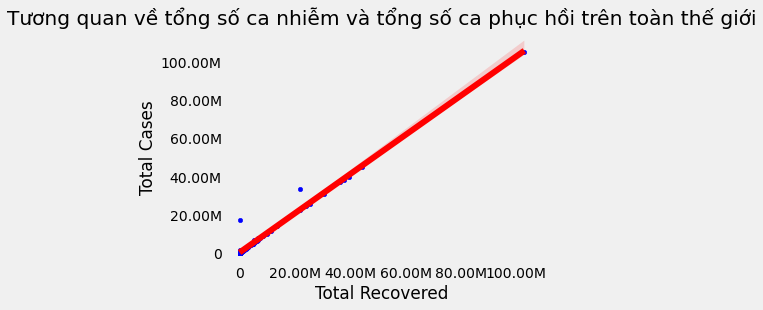

In [85]:
fig, ax = plt.subplots()
ax.set_title("Tương quan về tổng số ca nhiễm và tổng số ca phục hồi trên toàn thế giới")
covid_df[['Total Cases', 'Total Recovered']].plot.scatter(x='Total Recovered', y='Total Cases', ax=ax, color='blue', figsize=(5, 4))

ax.grid()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

sns.regplot(x='Total Recovered', y='Total Cases', data=covid_df, ax=ax, scatter=False, color='red')

plt.show()

- ***Nhận xét biểu đồ***:
  - Mối tương quan giữa 2 trường dữ liệu này gần như phụ thuộc nhau hoàn toàn khi tất cả các điểm dữ liệu tập trung thành 1 đường thẳng, điều này cho thấy số ca nhiễm và số ca hồi phục trên toàn thế giới gần như tuyến tính với nhau.
  - Từ đó, ta hiểu được rằng cứ số ca nhiễm trên thế giới ở từng quốc gia tăng lên thì số lượng người hồi phục cũng tăng theo, cho thấy được khả năng phòng chống dịch của các quốc gia đang được nâng cao và người dân có ý thức được tinh thần chống dịch bệnh.
  - Chính vì vậy, việc xây dựng mô hình hồi quy tuyến tính sẽ giúp ta theo dõi được ngay số lượng người được hồi phục ngay tương ứng với số ca nhiễm, nhưng bên cạnh đó cũng phải dùng các phương pháp thống kê để đánh giá mô hình, đảm bảo được độ chính xác cao nhất.

#### 3.3 Tổng số ca test trên toàn thế giới có mối quan hệ với tổng số ca nhiễm hay không?

- ***Trường dữ liệu được trực quan***: `Total Cases`, `Total Tests`
- ***Biểu đồ sử dụng***: Scatter plot (Biểu đồ phân tán)
- ***Tính phù hợp của biểu đồ***: Để thấy được mối tương quan giữa 2 trường dữ liệu để xem rằng 2 trường dữ liệu này có mối quan hệ tác động, phụ thuộc hoặc độc lập với nhau không.
- ***Mục đích của câu hỏi:*** Để nắm rõ được tình hình các ca test trên thế giới được phân bố như thế nào trước tổng số ca nhiễm trên mỗi quốc gia.

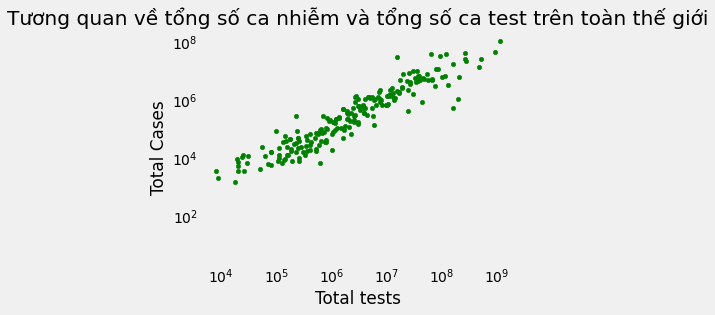

In [86]:
fig, ax = plt.subplots()
ax.set_title("Tương quan về tổng số ca nhiễm và tổng số ca test trên toàn thế giới")
covid_df[['Total Cases', 'Total tests']].plot.scatter(
    x='Total tests',
    y='Total Cases',
    ax=ax,
    color='green',
    figsize=(5, 4)
)

ax.grid()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

plt.xscale('log')
plt.yscale('log')
plt.show()

- ***Nhận xét biểu đồ***:
    - Số ca nhiễm và số ca test gần như hồi quy, 2 trường dữ liệu này có sự tương quan với nhau khi các điểm dữ liệu tạo thành 1 đường thẳng.
    - Từ đó, ta có thể rút ra được kết luận rằng số ca test covid sẽ phụ thuộc vào số ca nhiễm covid, khi số ca nhiễm tăng thì số ca test sẽ tăng.
    - Xét trường dữ liệu liên quan: Để tìm hiểu kỹ hơn, ta hãy theo dõi mối quan hệ giữa số ca nhiễm và số ca chết gây ra bởi dịch covid trong mục 2.3.4.

#### 4. Mối quan hệ xoay quanh trường dữ liệu `Tests/1M pop` (Tỷ lệ test trên 1 triệu dân):

#### 4.1 Tổng số ca dương tính, âm tính và số lần test trên 1 triệu dân của top 10 quốc gia sắp xếp tăng dần theo tổng số ca nhiễm.

- ***Trường dữ liệu được trực quan***: `Country, Tests/1M pop, Tot Cases/1M pop`
- ***Biểu đồ sử dụng***: Nested & Stacked Bar chart.
- ***Tính phù hợp của biểu đồ***:  Nested & Stacked Bar chart giúp hiển thị các phân loại và giá trị liên quan đến trường dữ liệu một cách rõ ràng và trực quan, giúp dễ dàng so sánh và phân tích dữ liệu, đồng thời cho phép hiển thị nhiều mức độ thông tin khác nhau trong cùng một biểu đồ. Nhờ vào những lợi ích đó, áp dụng vào quan hệ này để dễ dàng so sánh giữa số ca dương tính so với số ca âm tính và so sánh với số lần test trên 1 triệu dân.
- ***Mục đích của câu hỏi***:  Để xem tình hình, mức độ kiểm soát, phát hiện và ngăn ngừa dịch bệnh ở các quốc gia đứng đầu về số ca nhiễm.

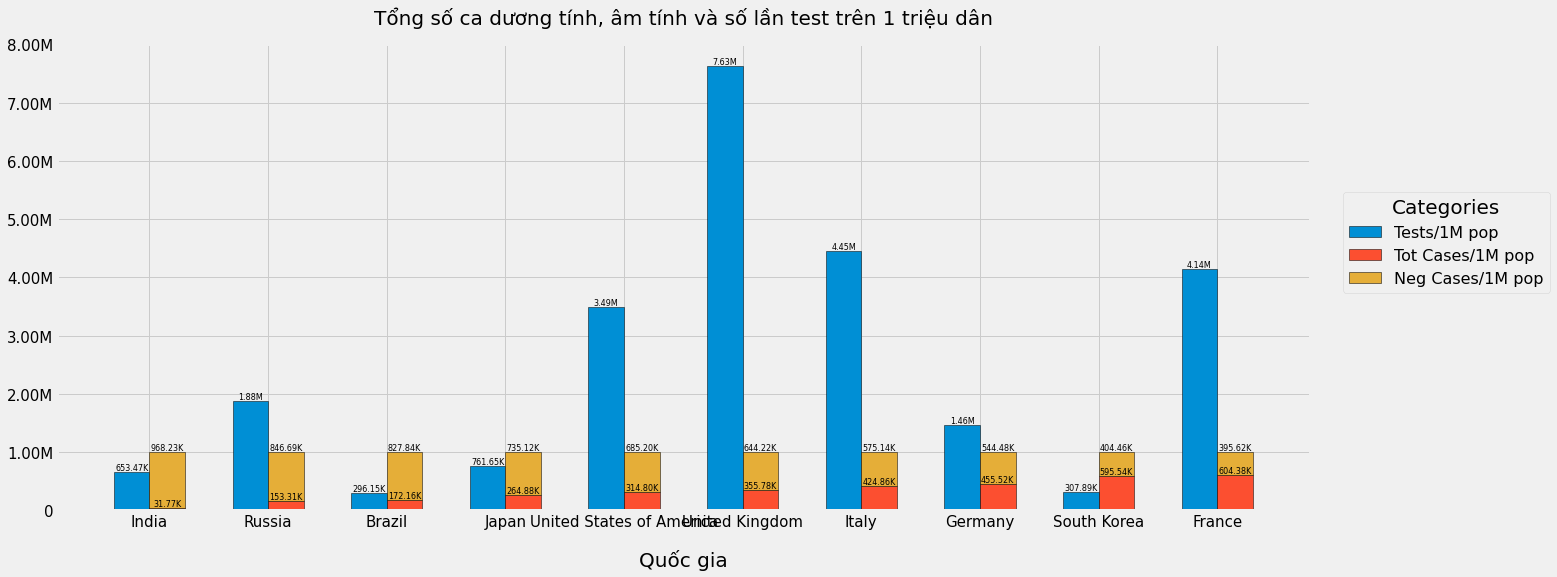

In [87]:
case_test_1m_pop = covid_df.nlargest(columns='Total Cases', n=10) \
                    .loc[:, ['Country', 'Tests/1M pop', 'Tot Cases/1M pop']] \
                    .sort_values('Tot Cases/1M pop')

case_test_1m_pop['Neg./1M pop'] = 10**6 - case_test_1m_pop['Tot Cases/1M pop']

plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(1,1, figsize = (20,8))
label = case_test_1m_pop['Country']

x = np.arange(len(label))
width = 0.3

rect1 = ax.bar(x - width/2,
              case_test_1m_pop['Tests/1M pop'],
              width = width, 
               label = 'Tests/1M pop',
               edgecolor = "black"
)

rect2 = ax.bar(x + width/2,
              case_test_1m_pop['Tot Cases/1M pop'],
              width = width,
               label = 'Tot Cases/1M pop',
               edgecolor = "black"
)
rect3 = ax.bar(x + width/2,
              case_test_1m_pop['Neg./1M pop'],
              width = width, 
               label = 'Neg Cases/1M pop',
               edgecolor = "black",
               bottom=case_test_1m_pop['Tot Cases/1M pop']
)
ax.bar_label(rect1, fontsize=8, labels=[format_y_axis(x) for x in case_test_1m_pop.iloc[:, 1]], label_type="edge")
ax.bar_label(rect2, fontsize=8, labels=[format_y_axis(x) for x in case_test_1m_pop.iloc[:, 2]], label_type="edge")
ax.bar_label(rect3, fontsize=8, labels=[format_y_axis(x) for x in case_test_1m_pop.iloc[:, 3]], label_type="edge")

# ax.set_ylabel("Số lượng", fontsize = 20, labelpad = 20)
ax.set_xlabel("Quốc gia", fontsize = 20, labelpad =20)
ax.set_title("Tổng số ca dương tính, âm tính và số lần test trên 1 triệu dân", fontsize = 20, pad = 20)
#set the ticks
ax.set_xticks(x)
ax.set_xticklabels(label)
#add the legends
#using the labels of the bars
ax.legend(title = "Categories", fontsize = 16, title_fontsize = 20, bbox_to_anchor = (1.02, 0.7))
#adjust the tick paramaters
ax.tick_params(axis = "x", which = "both", labelrotation = 90, labelsize = 15)
ax.tick_params(axis = "y", which = "both", labelsize = 15)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
ax.xaxis.set_tick_params(rotation=0)


plt.show()

- ***Nhận xét biểu đồ***:
    - Quốc gia lớn của Châu Âu gồm Anh, Ý và Pháp lần lượt là 3 nước dẫn đầu về mức độ kiểm tra phòng chống dịch bệnh, theo sau đó là 2 siêu cường quốc Mỹ và Nga.
    - Hàn Quốc là nước có mức độ kiểm tra phòng chống dịch bệnh thấp thứ 2 (chỉ sau Brazil), nhưng lại có số ca dương tính trên 1 triệu người cao thứ 2 (chỉ sau Pháp).
    - Ấn Độ là nước có số ca dương tính trên 1 triệu dân thấp nhất, thấp hơn đáng kể so với các nước còn lại trong top 10.

#### 5 Mối quan hệ xoay quanh trường dữ liệu `Total Deaths` (Tổng số ca tử vong) và `Total Cases` (Tổng số ca nhiễm):   

#### 5.1 Top 3 quốc gia có tổng số ca tử vong nhiều nhất và trong đó quốc gia nào bị ảnh hưởng sâu sắc nhất:

- ***Trường dữ liệu được trực quan***: `Total Deaths`
- ***Biểu đồ sử dụng***: Pie Chart.
- ***Tính phù hợp của biểu đồ***: Để dễ dàng so sánh top 3 quốc gia có tổng ca tử vong nhiều nhất, pie chart là một biểu đồ phù hợp vì việc so sánh được thể hiện rõ tỉ lệ phần trăm trên mỗi phần biểu đồ.
- ***Mục đích của câu hỏi:*** Để xem top 3 quốc gia có số ca tử vong nhiều nhất và trong đó nước nào bị ảnh hưởng sâu sắc nhất trong tình hình hiện tại:

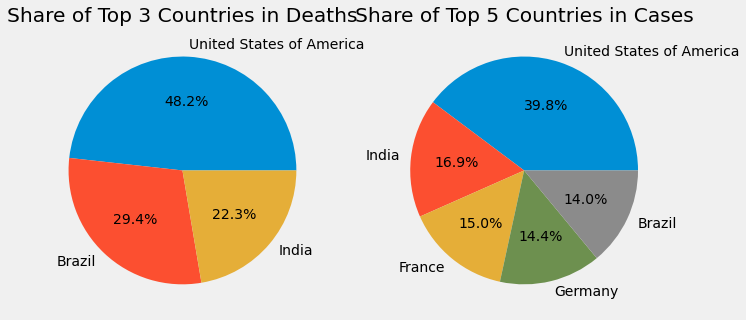

In [88]:
deaths_by_country = covid_df.groupby('Country')['Total Deaths'].sum()
sorted_deaths_by_country = deaths_by_country.sort_values(ascending=False)
top_3_deaths_by_country = sorted_deaths_by_country[:3]

cases_by_country = covid_df.groupby('Country')['Total Cases'].sum()
sorted_cases_by_country = cases_by_country.sort_values(ascending=False)
top_5_cases_by_country = sorted_cases_by_country[:5]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.pie(top_3_deaths_by_country, labels=top_3_deaths_by_country.index, autopct='%1.1f%%')
ax1.set_title('Share of Top 3 Countries in Deaths')

ax2.pie(top_5_cases_by_country, labels=top_5_cases_by_country.index, autopct='%1.1f%%')
ax2.set_title('Share of Top 5 Countries in Cases')

plt.show()

- ***Nhận xét biểu đồ:*** 
    - USA là quốc gia có số lượng tử vong nhiều nhất trong top 3. Điều này có thể được giải thích là do ban đầu Mỹ khá chủ quan trong việc phòng chống dịch bệnh Covid, Mỹ không bắt buộc đeo khẩu trang ở nơi công cộng thời đầu dịch. Hậu quả là số ca mắc tăng do miễn dịch cộng đồng không hiệu quả.
    - Quan hệ với các trường dữ liệu khác: Nhìn tổng quan biểu đồ, số ca nhiễm của Mỹ, Ấn Độ và Brazil cũng có tổng số ca nhiễm cao trong top 5 nên cũng dễ hiểu tại sao 3 nước lại có tỷ lệ tử vong cao có nhiều yếu tố nữa nhưng đa phần là do quá tải của hệ thống y tế.

#### 5.2 Vậy hậu đỉnh dịch thì bây giờ tổng số ca tử vong có tỉ lệ thuận với tổng số ca nhiễm không?

- ***Trường dữ liệu được trực quan***: `Total Cases`, `Total Deaths`.
- ***Biểu đồ sử dụng***: Scatter chart.
- ***Tính phù hợp của biểu đồ:*** Scatter là biểu đồ thông dụng nhất khi quan sát mối quan hệ của hai biến, đặc biệt là xem xét sự tương quan giữa hai biến đó. Với lý do như vậy nên sử dụng scatter plot cho câu hỏi xem xét liệu 2 biến `Total Cases` và `Total Deaths` có sự tương quan với nhau hay không là phù hợp.
- ***Mục đích của câu hỏi:*** Nhằm xem xét sự tương quan giữa tổng số ca nhiễm với tổng số ca tử vong theo châu lục. Nếu ca nhiễm giảm thì ca tử vong phải giảm, và ngược lại. Phân biệt theo châu lục vì mỗi châu lục có những điểm khác nhau về tập tính văn hóa nên phân biệt châu lục sẽ thấy được tương quan rõ nhất.

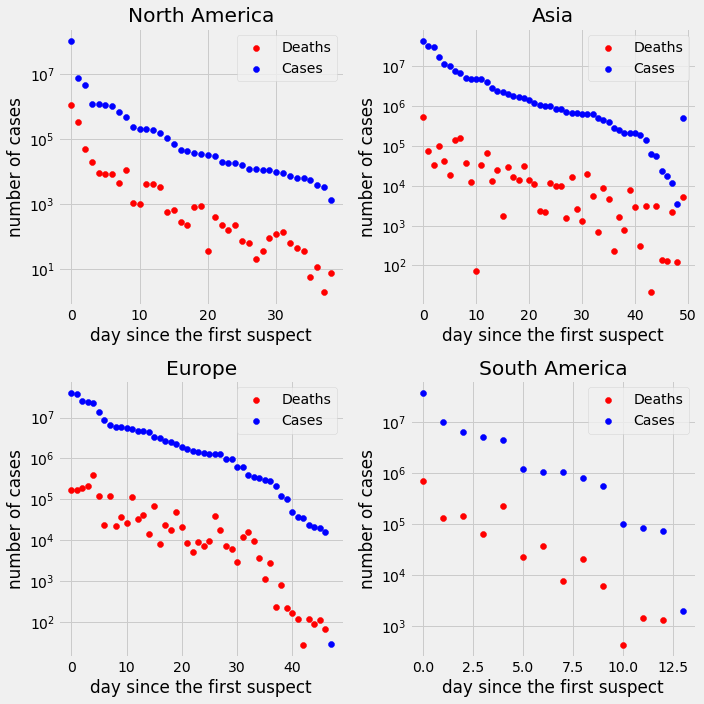

In [89]:
df = covid_df["Continent"].unique()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
for idx, ax in enumerate(axes.flat):
    c = covid_df[covid_df['Continent']==df[idx]].reset_index()
    ax.scatter(np.arange(0,len(c)),c['Total Deaths'],color='red',label='Deaths')
    ax.scatter(np.arange(0,len(c)),c['Total Cases'],color='blue',label='Cases')
    ax.set_title(df[idx])
    ax.set_xlabel('day since the first suspect')
    ax.set_ylabel('number of cases')
    ax.set_yscale("log")
    ax.legend()
plt.tight_layout()
plt.show()

- ***Nhận xét các biểu đồ:***
  - Qua biểu đồ, nhóm nhận thấy đa số tổng ca nhiễm ở các châu lục để giảm dần theo một đường đi xuống và tổng số ca tử vong cũng giảm thấy rõ ràng. Chứng minh rằng tình hình dịch đã được kiểm soát.
  - Nhìn chung, các quốc gia trên thế giới kiểm soát tình hình dịch rất tốt và ổn định, số ca mắc mới giảm dần, số ca phục hồi tăng lên.
  - Mối quan hệ nhân quả: Mối quan hệ suy ra ở đây là nếu các biện pháp phòng chống dịch bệnh được hiệu quả thì số ca tử vong giảm khi số ca mắc bệnh giảm.

#### 5.3 Số ca nhiễm, chết và hồi phục được phân bố như thế nào theo từng châu lục:

- ***Trường dữ liệu được trực quan:*** `Total Cases`, `Total Deaths`, `Total Recovered`
- ***Biểu đồ sử dụng:*** Multiple bar chart.
- ***Tính phù hợp của biểu đồ:*** Để có thể theo dõi được nhiều trường dữ liệu trên các châu lục cùng 1 lúc, dùng multiple bar chart để có cái nhìn tổng quan, dễ đối chiếu các số liệu với nhau.
- ***Mục đích của câu hỏi:*** Kiểm tra tình hình phân bố số ca nhiễm, chết và hồi phục theo từng châu lục.

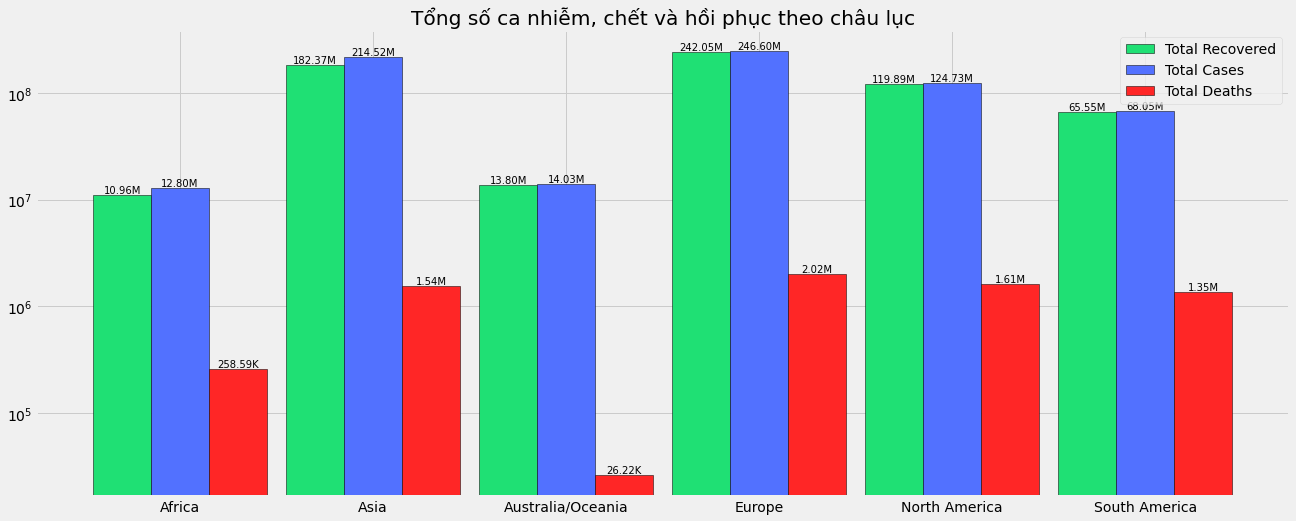

In [90]:
fig, ax = plt.subplots(1,1, figsize = (20, 8))
width = 0.3

recover = pd.DataFrame(covid_df.groupby(["Continent"])["Total Recovered"].agg(sum))
cases = pd.DataFrame(covid_df.groupby(["Continent"])["Total Cases"].agg(sum))
deaths = pd.DataFrame(covid_df.groupby(["Continent"])["Total Deaths"].agg(sum))

continent = cases["Total Cases"].keys()
x = np.arange(len(continent))
ax.set_xticks(x)
ax.set_xticklabels(continent)

ax.set_title("Tổng số ca nhiễm, chết và hồi phục theo châu lục")
rect1 = ax.bar(
    x - width,
    recover["Total Recovered"].values,
    width = width, 
    label = 'Total Recovered',
    edgecolor = "black",
    color = "#1fe074",
)

ax.bar_label(
    ax.containers[0],
    fontsize=10,
    labels=[format_y_axis(x) for x in recover["Total Recovered"].values], 
    label_type="edge",
)

rect2 = ax.bar(
    x,
    cases["Total Cases"].values,
    width = width, 
    label = 'Total Cases',
    edgecolor = "black",
    color = "#5271FF"
)

ax.bar_label(
    ax.containers[1],
    fontsize=10,
    labels=[format_y_axis(x) for x in cases["Total Cases"].values], 
    label_type="edge",
)

rect3 = ax.bar(
    x + width,
    deaths["Total Deaths"].values,
    width = width, 
    label = 'Total Deaths',
    edgecolor = "black",
    color = "#FF2626"
)

ax.bar_label(
    ax.containers[2],
    fontsize=10,
    labels=[format_y_axis(x) for x in deaths["Total Deaths"].values], 
    label_type="edge",
)

ax.legend(["Total Recovered", "Total Cases", "Total Deaths"])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))
plt.yscale('log')

plt.show()

- **Nhận xét biểu đồ**:
    - Từ biểu đồ, ta có thể thấy được Châu Âu, dùng là lục địa có diện tích tương đối nhỏ và số dân tương đối ít, nhưng lại cao nhất về số người mắc covid và số người chết bởi covid (với gần 247 triệu ca nhiễm và 2 triệu người chết)
    - Tuy nhiên Châu Âu cũng dẫn đầu về số người hồi phục cao nhất với 242 triệu người, mặt khác, Châu Á có số ca nhiễm cao hơn Bắc Mỹ tuy nhiên số người chết ở Châu Á lại ít hơn Bắc Mỹ (1,6 triệu người chết ở Bắc Mỹ và 1,5 triệu người chết ở Châu Á)
    - Tóm lại, biểu đồ này giúp ta có cái nhìn khách quan hơn về tình hình dịch ở từng châu lục từ đó đánh giá được tình hình phòng chống dịch covid ở mỗi châu lục.

#### 6. Mối quan hệ xoay quanh các trường dữ liệu khác: 
#### 6.1 Các quốc gia có tỉ lệ 1 ca nhiễm trên ít số người nhất:
- ***Trường dữ liệu được trực quan***: `1 Case every X ppl`
- ***Biểu đồ sử dụng***: Bar chart.
- ***Tính phù hợp của biểu đồ***: Để dễ dàng so sánh top 10 quốc gia có tỉ lệ 1 ca nhiễm trên ít số người nhất, bar chart là một biểu đồ phù hợp vì việc so sánh được thể hiện rõ ở chiều cao các cột tương ứng với các quốc gia (các giá trị rời rạc).
- ***Mục đích của câu hỏi:*** Kiểm tra tỉ lệ nhiễm bệnh cao nhất của các quốc gia để rút ra được lý do và cảnh báo cho các quốc gia này.

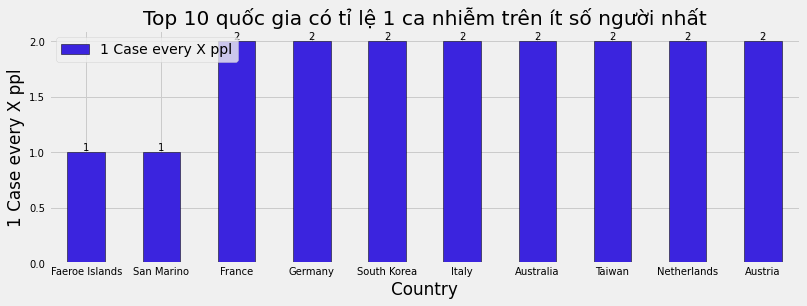

In [91]:
fig, ax = plt.subplots()
ax.set_title("Top 10 quốc gia có tỉ lệ 1 ca nhiễm trên ít số người nhất")
covid_df.drop(covid_df[covid_df['1 Case every X ppl'] == 0].index)[['Country', '1 Case every X ppl']].nsmallest(
    n=10,
    columns=['1 Case every X ppl']
).plot(
    kind="bar",
    color=(0.23, 0.14, 0.87),
    figsize=(12, 4),
    x='Country',
    xlabel="Country",
    ylabel='1 Case every X ppl',
    fontsize=10, ax=ax,
    edgecolor="black"
)

ax.bar_label(
    ax.containers[0],
    fontsize=10,
)

ax.xaxis.set_tick_params(rotation=0)
plt.show()

- ***Nhận xét biểu đồ***:
  - Faeroe Islands và San Marino là 2 quốc gia có tỉ lệ nhiễm bệnh cao nhất khi trung bình cứ 1 người thì người đó sẽ nhiễm covid.
  - Ngoài ra, các nước nằm trong top 10 tỉ lệ nhiễm bệnh cao nhất này cũng không khá hơn khi trung bình cứ 2 người thì có 1 người nhiễm covid.
  - Đặc biệt hơn, các quốc gia này là các nước phát triển và như Đức, Pháp, Hàn Quốc, Ý, ...
  - Điều này cho thấy đa số các nước phát triển sẽ có mật độ dân cư cao, dễ tập trung đông người, từ đó gây ra lây lan dịch bệnh nhanh.
  - Ta sẽ xem các quốc gia có tỉ lệ chết trên số người ít nhất để xem nó có mối quan hệ gì đến với tỉ lệ nhiễm bệnh hay không.

#### 6.2 Top 10 quốc gia có tỉ lệ 1 ca chết trên ít số người nhất
- ***Trường dữ liệu được trực quan:*** `1 Death every X ppl`
- ***Biểu đồ sử dụng:*** Bar chart.
- ***Tính phù hợp của biểu đồ:*** Để dễ dàng so sánh top 10 quốc gia có tỉ lệ 1 ca chết trên ít số người nhất, bar chart là một biểu đồ phù hợp vì việc so sánh được thể hiện rõ ở chiều cao các cột tương ứng với các quốc gia (các giá trị rời rạc).
- ***Mục đích của câu hỏi:*** Kiểm tra tỉ lệ chết cao nhất để xem xét mối quan hệ với tỉ lệ nhiễm bệnh.

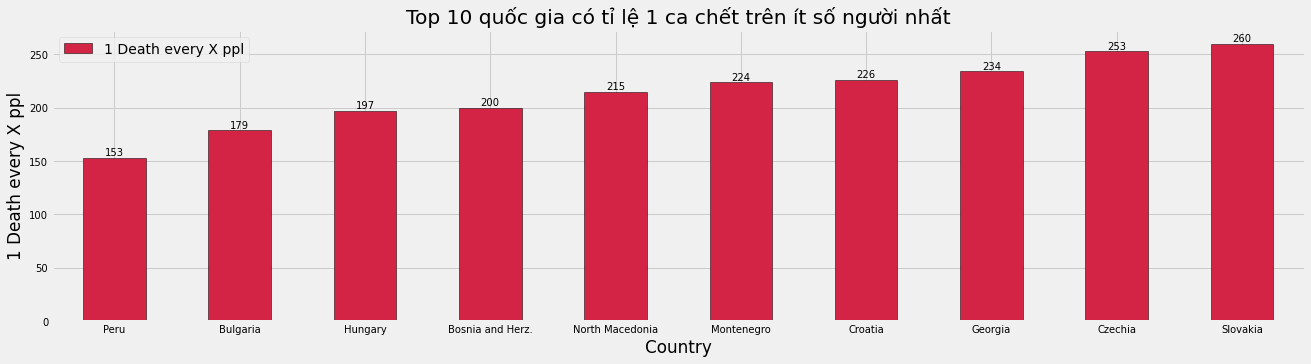

In [92]:
fig, ax = plt.subplots()
ax.set_title("Top 10 quốc gia có tỉ lệ 1 ca chết trên ít số người nhất")
covid_df.drop(covid_df[covid_df['1 Death every X ppl'] == 0].index)[['Country', '1 Death every X ppl']].nsmallest(
    n=10,
    columns=['1 Death every X ppl']
).plot(
    kind="bar",
    color=(0.83, 0.14, 0.27),
    figsize=(20, 5),
    x='Country',
    xlabel="Country",
    ylabel='1 Death every X ppl',
    fontsize=10, ax=ax,
    edgecolor="black"
)

ax.bar_label(
    ax.containers[0],
    fontsize=10,
)

ax.xaxis.set_tick_params(rotation=0)
plt.show()

- ***Nhận xét biểu đồ***:
  - Từ biểu đồ, ta có thể thấy được tỉ lệ chết do covid trên số người ở các quốc gia này khá thấp, trải dài từ khoảng 150 người đến hơn 250 người.
  - Tuy nhiên, các quốc gia nằm trong top tỉ lệ chết trên số người lại không phải là các quốc gia phát triển, mà đó là các nước như Peru, Bulgaria, Montenegro,... Nhìn chung là các quốc gia đang phát triển.
  - Điều đó cho thấy được rằng các quốc gia phát triển thì sẽ có tỉ lệ mắc bệnh cao hơn nhưng ở các quốc gia kém phát triển hơn, do điều kiện phòng chống dịch chưa được tốt, nên tỉ lệ chết do covid của những quốc gia này cao hơn hẳn.